In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.impute import SimpleImputer
from scipy.stats import zscore
import numpy as np

In [2]:
# Specify the local file path on your laptop
file_path = 'D:/top250-00-19.csv'

# Read the CSV file
df = pd.read_csv(file_path)

label_encoder = LabelEncoder()
for col in df.columns:
    if df[col].dtype not in ['int64', 'float64']:
        df[col] = label_encoder.fit_transform(df[col])

#df=df.fillna(df['Transfer_fee'].mean())
df=df.dropna()
df = df[df['Age'] >= 16]


X = df.drop(['Transfer_fee','Name','Season','League_from','League_to','Position'], axis=1)
y = df['Transfer_fee']

In [3]:
z_scores = zscore(df)
df = df[(z_scores < 3).all(axis=1)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

KNN R-squared: 0.7732440633821498
Percentage of Variance Explained (KNN): 77.32%


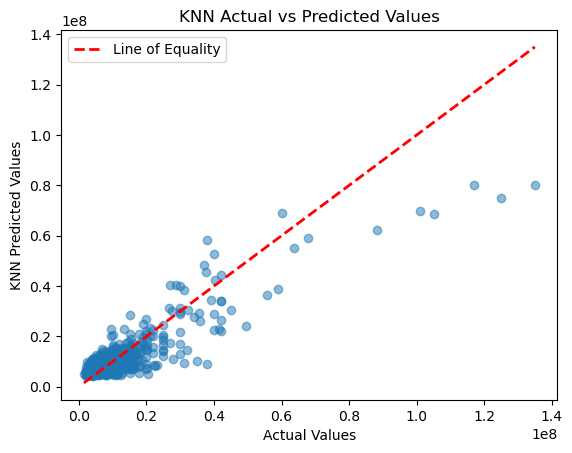

In [4]:
knn = KNeighborsRegressor(n_neighbors=14)

cv_scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='r2')

knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)


r2_knn = r2_score(y_test, y_pred_knn)
print(f"KNN R-squared: {r2_knn}")


variance_explained_knn = r2_knn * 100
print(f"Percentage of Variance Explained (KNN): {variance_explained_knn:.2f}%")


plt.scatter(y_test, y_pred_knn, alpha=0.5, label='_nolegend_')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Line of Equality')
plt.xlabel("Actual Values")
plt.ylabel("KNN Predicted Values")
plt.title("KNN Actual vs Predicted Values")
plt.legend()
plt.show()